In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-tracking-autism/Metadata_Participants.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/18.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/20.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/1.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/24.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/11.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/17.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/16.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/3.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/19.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/5.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/2.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/13.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/23.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/14.csv
/kaggle/input/eye-tracking-autism/Eye-tracking Output/4.csv
/kaggle/input/eye-tracking-aut

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
All_Observation = pd.DataFrame()
for i in range(1,26,1):
    file_path = f'/kaggle/input/eye-tracking-autism/Eye-tracking Output/{i}.csv'
    observation = pd.read_csv(file_path,low_memory = False)
    All_Observation = pd.concat([All_Observation,observation],axis=0,ignore_index=True)

All_Observation.head(10)

,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Participant,Color,Tracking Ratio [%],...,Pupil Position Left X [px],Pupil Position Left Y [px],Port Status,AOI Group Right,AOI Scope Right,AOI Order Right,AOI Group Left,AOI Scope Left,AOI Order Binocular,groupe d'enfants
0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,4780140.235,13:22:17:379,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,4780160.125,13:22:17:399,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,4780179.991,13:22:17:419,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,4780199.868,13:22:17:439,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,4780219.754,13:22:17:458,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Number of rows in observations is :', All_Observation.shape[0])
print('Number of features for observations is :', All_Observation.shape[1])

Number of rows in observations is : 2252943
Number of features for observations is : 59


In [5]:
print(All_Observation.shape)

(2252943, 59)


In [6]:
print('Feature names are:', All_Observation.columns)

Feature names are: Index(['Unnamed: 0', 'RecordingTime [ms]', 'Time of Day [h:m:s:ms]', 'Trial',
       'Stimulus', 'Export Start Trial Time [ms]',
       'Export End Trial Time [ms]', 'Participant', 'Color',
       'Tracking Ratio [%]', 'Category Group', 'Category Right',
       'Category Left', 'Index Right', 'Index Left',
       'Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]',
       'Point of Regard Right X [px]', 'Point of Regard Right Y [px]',
       'Point of Regard Left X [px]', 'Point of Regard Left Y [px]',
       'AOI Name Right', 'AOI Name Left', 'Gaze Vector Right X',
       'Gaze Vector Right Y', 'Gaze Vector Right Z', 'Gaze Vector Left X',
       'Gaze Vector Left Y', 'Gaze Vector Left Z', 'Annotation Name',
       'Annotation Description', 'Annotation Tags', 'Mouse Position X [px]',
       'Mouse Position Y [px]', 'Scroll Direction X', 'Scroll Direction Y',
       'Content', 'Pupil Size Right X [px]', 'Pupil Size Right Y [px]',
       'Pupil Size Left X [px]', '

In [7]:
Participants = pd.read_csv('/kaggle/input/eye-tracking-autism/Metadata_Participants.csv',low_memory = False)
Participants.head()

,ParticipantID,Gender,Age,Class,CARS Score
0,1,M,7.0,ASD,32.5
1,2,F,8.9,ASD,36.5
2,3,M,4.4,ASD,27.0
3,4,M,6.9,ASD,35.0
4,5,M,8.9,ASD,31.0


In [8]:
All_Observation.rename(columns={'Participant':'ParticipantID'}, inplace=True)

In [9]:
print("Count of null value in column of 'ParticipantID' = ",All_Observation['ParticipantID'].isna().sum())

Count of null value in column of 'ParticipantID' =  0


In [10]:
grouped_obs = All_Observation.groupby('ParticipantID', dropna=False).size().reset_index(name='count')
print(grouped_obs)

print('Number of Participants in observation is :', len(grouped_obs))

        ParticipantID   count
0                  11    6188
1                  17    3518
2                  18    6420
3                  19    6855
4                  20    7006
..                ...     ...
61                  7    6187
62                  8    6265
63                  9    7658
64  Unidentified(Neg)  878362
65  Unidentified(Pos)   23424

[66 rows x 2 columns]
Number of Participants in observation is : 66


In [11]:
MaxValue = Participants['ParticipantID'].max()
print("The Max_ParticipantID = ",MaxValue)

The Max_ParticipantID =  59


In [12]:
All_Observation['ParticipantID'] = All_Observation['ParticipantID'].replace('Unidentified(Neg)', MaxValue + 1)
All_Observation['ParticipantID'] = All_Observation['ParticipantID'].replace('Unidentified(Pos)', MaxValue + 1)

All_Observation['ParticipantID'] = pd.to_numeric(All_Observation['ParticipantID'], errors='coerce').astype('Int64')
Count_60 = All_Observation[All_Observation['ParticipantID'] == 60]['ParticipantID'].count()
#grouped_df = All_Observation.groupby('ParticipantID', dropna=False).size().reset_index(name='count')
#print(grouped_df)
#Count_60 = grouped_df[grouped_df['ParticipantID'] == 60]['count'].sum()

print('Number of Participants after converting to integer:', len(All_Observation.ParticipantID.unique()))
print("Count of records for 'ParticipantID=60' is : ",Count_60)
print('Count of all observation except 60 is : ',All_Observation.shape[0] - Count_60 )

Number of Participants after converting to integer: 58
Count of records for 'ParticipantID=60' is :  901786
Count of all observation except 60 is :  1351157


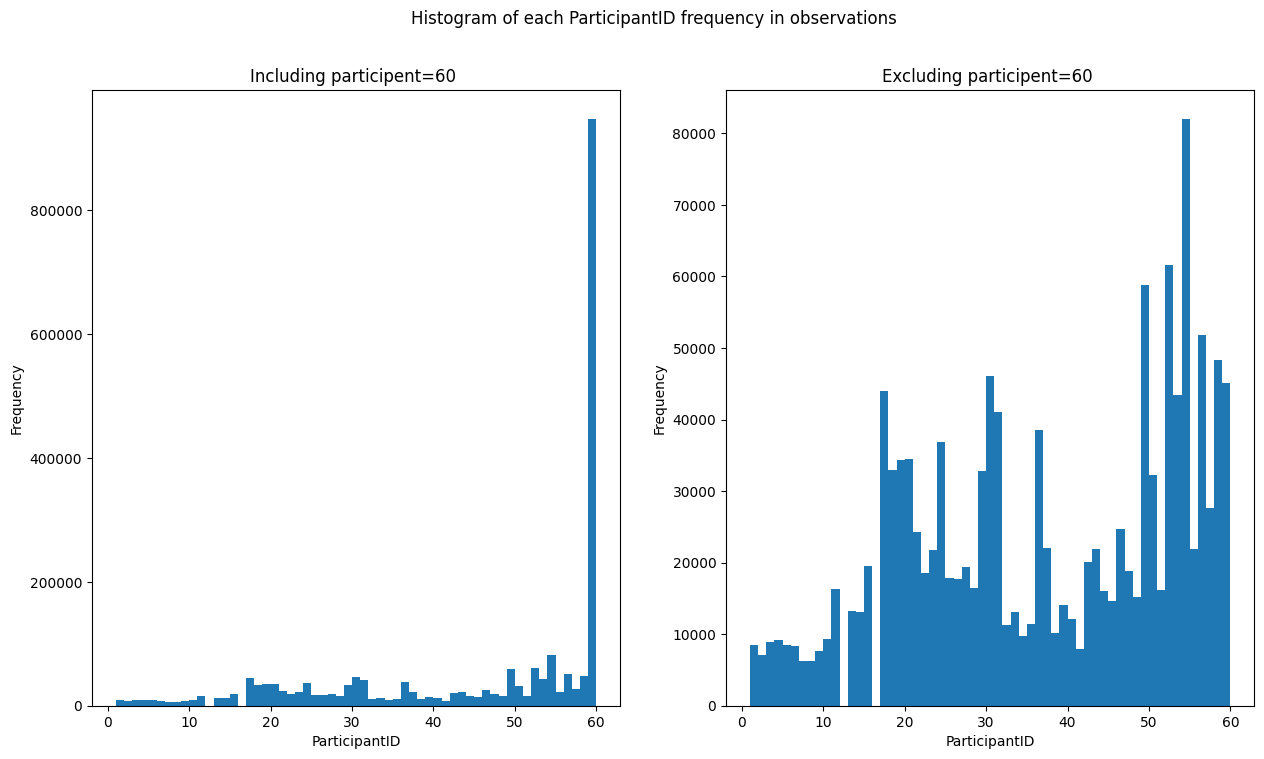

In [13]:
import matplotlib.pyplot as plt
import numpy as np


n_bins = range(1,All_Observation['ParticipantID'].max()+1,1)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 8))
#width = 101

ax1.hist(All_Observation['ParticipantID'], bins = n_bins)
ax1.set_xlabel('ParticipantID')
ax1.set_ylabel('Frequency')
ax1.title.set_text('Including participent=60 ')

ax2.hist(All_Observation[All_Observation['ParticipantID'] != 60]['ParticipantID'], bins= n_bins)
ax2.set_xlabel('ParticipantID')
ax2.set_ylabel('Frequency')
ax2.title.set_text('Excluding participent=60 ')

plt.suptitle('Histogram of each ParticipantID frequency in observations')
plt.show()

Skewness: -0.292999
Mean: 36.63752028816784
Median: 37.0
Standard deviation: 16.227654853096713
Q1: 23.0
Q2 (median): 37.0
Q3: 52.0


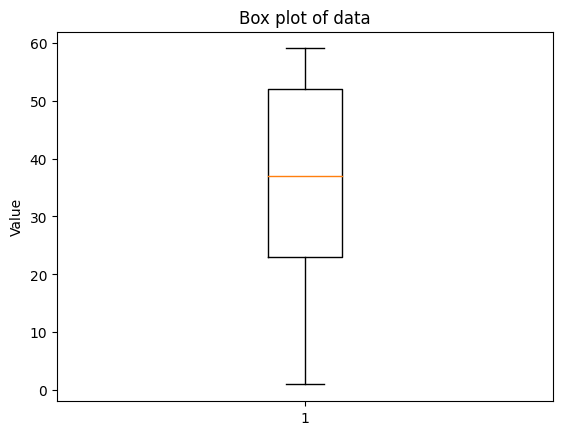

In [14]:
Filtered_Participants = All_Observation[All_Observation['ParticipantID'] != 60]['ParticipantID']
mean = np.mean(Filtered_Participants)
median = np.median(Filtered_Participants)
std = np.std(Filtered_Participants)
q1, q2, q3 = np.percentile(Filtered_Participants, [25, 50, 75])

plt.boxplot(Filtered_Participants)

plt.title('Box plot of data')
plt.ylabel('Value')


print("Skewness: %f" % Filtered_Participants.skew())
print('Mean:', mean)
print('Median:', median)
print('Standard deviation:', std)
print('Q1:', q1)
print('Q2 (median):', q2)
print('Q3:', q3)

plt.show()

In [15]:
if 'Age' not in All_Observation:
    All_Observation = pd.merge(All_Observation, Participants, how='inner', on = 'ParticipantID')


# 5 rows × 63 columns
All_Observation.head()

,Unnamed: 0,RecordingTime [ms],Time of Day [h:m:s:ms],Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],ParticipantID,Color,Tracking Ratio [%],...,AOI Scope Right,AOI Order Right,AOI Group Left,AOI Scope Left,AOI Order Binocular,groupe d'enfants,Gender,Age,Class,CARS Score
0,0,4780015.315,13:22:17:254,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,F,11.5,TD,NaN
1,1,4780020.865,13:22:17:260,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,F,11.5,TD,NaN
2,2,4780040.758,13:22:17:279,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,F,11.5,TD,NaN
3,3,4780080.503,13:22:17:319,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,F,11.5,TD,NaN
4,4,4780120.360,13:22:17:359,Trial020,20 eye tracking (ballon droite).avi,0.0,52058.676,50,Coral,78.5652,...,NaN,NaN,NaN,NaN,NaN,NaN,F,11.5,TD,NaN


In [16]:
print('Number of rows after join two datasets = ' , All_Observation.shape[0])
print('Number of columns after join two datasets = ' , All_Observation.shape[1])

Number of rows after join two datasets =  1351157
Number of columns after join two datasets =  63


In [17]:
import pandas as pd
import numpy as np

num_asd_participants = All_Observation[All_Observation['Class'] == 'ASD']['ParticipantID'].nunique()

num_td_participants = All_Observation[All_Observation['Class'] == 'TD']['ParticipantID'].nunique()

total_participants = All_Observation['ParticipantID'].nunique()

ASD_prob = num_asd_participants / total_participants
TD_prob = 1 - ASD_prob

print('Number of unique participants with ASD:', num_asd_participants)
print('Number of unique participants with TD:', num_td_participants)
print('Probability of ASD is :', np.round(ASD_prob, 2))
print('Probability of TD is :', round(TD_prob, 2))


Number of unique participants with ASD: 27
Number of unique participants with TD: 30
Probability of ASD is : 0.47
Probability of TD is : 0.53


423727


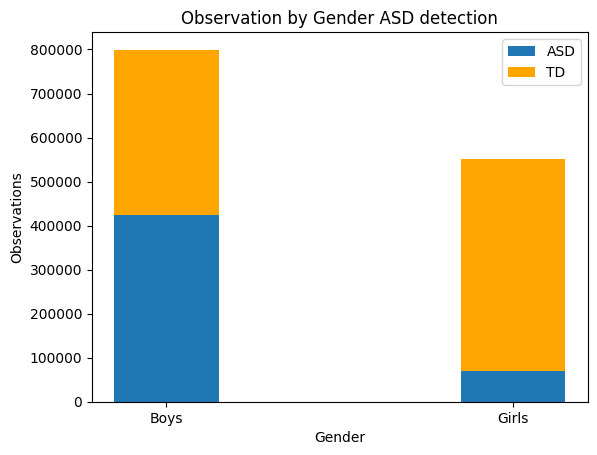

In [18]:
labels_Gender = ['Boys', 'Girls']

Male_ASD = All_Observation.loc[(All_Observation['Gender']=='M')&(All_Observation['Class']=='ASD')]['Gender'].count()
print(Male_ASD)
Female_ASD = All_Observation.loc[(All_Observation['Gender']=='F')&(All_Observation['Class']=='ASD')]['Gender'].count()
Gender_ASD = [Male_ASD, Female_ASD]

Male_TD = All_Observation.loc[(All_Observation['Gender']=='M')&(All_Observation['Class']=='TD')]['Gender'].count()
Female_TD = All_Observation.loc[(All_Observation['Gender']=='F')&(All_Observation['Class']=='TD')]['Gender'].count()
Gender_TD = [Male_TD, Female_TD]


fig, ax = plt.subplots(1,1)
width = 0.3
ax.bar(labels_Gender, Gender_ASD, width, label='ASD',color='tab:blue')
ax.bar(labels_Gender, Gender_TD, width, bottom=Gender_ASD,label='TD',color='orange')
ax.set_xlabel('Gender')
ax.set_ylabel('Observations')
ax.set_title('Observation by Gender ASD detection')
ax.legend()

plt.show()

In [19]:
All_Observation2 = All_Observation.replace('-',np.nan)
All_Observation = All_Observation2
print("Replacing character '-' finished successfully")

Temp_List = ['Gaze Vector Right Y', 'Gaze Vector Left Y']

for Column in Temp_List :
    All_Observation[Column] = All_Observation[Column].astype(np.float16)
    All_Observation[Column]= All_Observation[Column].fillna(value = 0)

print("Replacing null value by 0 finished successfully***")

Temp_List = ['Gaze Vector Right Z', 'Gaze Vector Left Z','Index Right','Index Left']

for Column in Temp_List :
    New_Value = 0
    All_Observation[Column] = All_Observation[Column].astype(np.float16)
    New_Value = All_Observation[All_Observation[Column] != 0][Column].mode()[0]
    All_Observation[Column]= All_Observation[Column].fillna(value = New_Value)

print('Replacing null value by Mode finished successfully***')


import math
Temp_List = ['Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]', 'Point of Regard Right Y [px]',
                  'Point of Regard Left X [px]', 'Point of Regard Left Y [px]', 'Gaze Vector Right X', 'Gaze Vector Left X',
                  'Pupil Size Right X [px]', 'Pupil Size Right Y [px]', 'Pupil Size Left X [px]', 'Pupil Size Left Y [px]',
                  'Eye Position Right X [mm]', 'Eye Position Right Y [mm]', 'Eye Position Right Z [mm]',
                  'Eye Position Left X [mm]', 'Eye Position Left Y [mm]', 'Eye Position Left Z [mm]',
                  'Pupil Position Right X [px]', 'Pupil Position Right Y [px]', 'Pupil Position Left X [px]',
                  'Pupil Position Left Y [px]']

for Column in Temp_List :
    New_Value = 0
    All_Observation[Column] = All_Observation[Column].astype(np.float16)
    Column_Copy = All_Observation[Column].copy().tolist()
    Column_Copy = [x for x in Column_Copy if not math.isnan(x)]
    New_Value = sum(Column_Copy) /len(Column_Copy)
    All_Observation[Column]= All_Observation[Column].fillna(value = New_Value)

print('Replacing null value by Mean finished successfully***')

Replacing character '-' finished successfully
Replacing null value by 0 finished successfully***
Replacing null value by Mode finished successfully***
Replacing null value by Mean finished successfully***


In [20]:
Temp_List = ['AOI Name Right', 'AOI Name Left', 'Annotation Name', 'Annotation Description', 'Annotation Tags', 'Mouse Position X [px]',
               'Mouse Position Y [px]', 'Scroll Direction X', 'Scroll Direction Y', 'Content', 'Port Status',
               'AOI Group Right', 'AOI Group Left', 'AOI Scope Right', 'AOI Scope Left', 'AOI Order Right',
               'AOI Order Binocular', "groupe d'enfants", 'CARS Score','Time of Day [h:m:s:ms]','Unnamed: 0',
               'RecordingTime [ms]','Tracking Ratio [%]','ParticipantID'
            ]
for Column in Temp_List:
    if Column in All_Observation.columns:
        del All_Observation[Column]

print("Removing null columns finished successfully***")


Removing null columns finished successfully***


In [21]:
print('Count of Rows before removing duplicate rows : ' ,len(All_Observation))
All_Observation = All_Observation.drop_duplicates()
print('Count of Rows before removing duplicate rows : ' ,len(All_Observation))

Count of Rows before removing duplicate rows :  1351157
Count of Rows before removing duplicate rows :  1110930


In [22]:
Temp_List = ['Pupil Diameter Right [mm]', 'Pupil Diameter Left [mm]', 'Point of Regard Right X [px]',
             'Point of Regard Right Y [px]','Point of Regard Left X [px]',
             'Point of Regard Left Y [px]', 'Gaze Vector Right X',
             'Gaze Vector Left X','Pupil Size Right X [px]', 'Pupil Size Right Y [px]',
             'Pupil Size Left X [px]', 'Pupil Size Left Y [px]','Eye Position Right X [mm]',
             'Eye Position Right Y [mm]', 'Eye Position Right Z [mm]','Eye Position Left X [mm]',
             'Eye Position Left Y [mm]', 'Eye Position Left Z [mm]','Pupil Position Right X [px]',
             'Pupil Position Right Y [px]', 'Pupil Position Left X [px]','Pupil Position Left Y [px]',
             'Gaze Vector Right Z', 'Gaze Vector Left Z','Gaze Vector Right Y',
             'Gaze Vector Left Y','Index Right','Index Left']


for Column in Temp_List :
    All_Observation[Column] = All_Observation[Column].astype(np.float16)

All_Observation['Diameter'] = All_Observation['Pupil Diameter Right [mm]']+All_Observation['Pupil Diameter Left [mm]']
All_Observation['POG'] = All_Observation['Point of Regard Right X [px]']+All_Observation['Point of Regard Right Y [px]']+All_Observation['Point of Regard Left X [px]']+All_Observation['Point of Regard Left Y [px]']
All_Observation['GazeVector'] = All_Observation['Gaze Vector Right X']+ All_Observation['Gaze Vector Right Y']+All_Observation['Gaze Vector Right Z']+All_Observation['Gaze Vector Left X']+ All_Observation['Gaze Vector Left Y']+All_Observation['Gaze Vector Left Z']
All_Observation['PupilSize'] = All_Observation['Pupil Size Right X [px]']+All_Observation['Pupil Size Right Y [px]']+All_Observation['Pupil Size Left X [px]']+All_Observation['Pupil Size Left Y [px]']
All_Observation['EyePosition'] = All_Observation['Eye Position Right X [mm]']+All_Observation['Eye Position Right Y [mm]']+All_Observation['Eye Position Right Z [mm]']+All_Observation['Eye Position Left X [mm]']+All_Observation['Eye Position Left Y [mm]']+All_Observation['Eye Position Left Z [mm]']
All_Observation['PupilPosition'] = All_Observation['Pupil Position Right X [px]']+All_Observation['Pupil Position Right Y [px]']+All_Observation['Pupil Position Left X [px]']+All_Observation['Pupil Position Left X [px]']
All_Observation['Index'] = All_Observation['Index Right']+All_Observation['Index Left']
All_Observation = All_Observation.drop(Temp_List,axis=1)

if All_Observation[(All_Observation['Gender']=='F') | (All_Observation['Gender'] =='M')]['Gender'].count()>0:
    All_Observation['Gender'] = All_Observation['Gender'].map({'M' : 0, 'F' : 1})

if All_Observation[(All_Observation['Class']=='TD') | (All_Observation['Class'] =='ASD')]['Class'].count()>0:
    All_Observation['Class'] = All_Observation['Class'].map({'TD' : 0, 'ASD' : 1})

print("Converting 'Class' and 'Gender' to binary type finished successfully***")


if All_Observation['Trial'].dtypes != 'int64':
    All_Observation['Trial'] = All_Observation['Trial'].map({'Trial001' : 1, 'Trial002' : 2, 'Trial003' : 3, 'Trial004' : 4,
                                                             'Trial005' : 5, 'Trial006' : 6, 'Trial007' : 7, 'Trial008' : 8,
                                                             'Trial009' : 9, 'Trial010' : 10, 'Trial011' : 11, 'Trial012' : 12,
                                                             'Trial013' : 13, 'Trial014' : 14, 'Trial015' : 15, 'Trial016' : 16,
                                                             'Trial017' : 17, 'Trial018' : 18, 'Trial019' : 19, 'Trial020' : 20,
                                                             'Trial021' : 21, 'Trial022' : 22, 'Trial023' : 23, 'Trial024' : 24,
                                                             'Trial025' : 25, 'Trial026' : 26, 'Trial027' : 27, 'Trial028' : 28,
                                                             'Trial029' : 29, 'Trial030' : 30, 'Trial031' : 31, 'Trial032' : 32,
                                                             'Trial033' : 33, 'Trial034' : 34})
    print("Converting 'Trial' to binary type finished successfully***")
else:
    print('Nothing to change...')


if All_Observation['Color'].dtypes != 'int64':
    All_Observation['Color'] = All_Observation['Color'].map({'Coral':1,'CornflowerBlue':2,'Crimson':3,'Cyan':4,'DarkBlue':5,
                                                             'DarkCyan':6,'DarkGoldenrod':7,'DarkGray':8,'DarkGreen':9,
                                                             'DarkKhaki':10,'DarkMagenta':11,'DarkOliveGreen':12,
                                                             'DarkOrange':13,'DarkOrchid':14,'DarkRed':15,'DarkSalmon':16,
                                                             'DarkSeaGreen':17,'DarkSlateBlue':18,'DarkSlateGray':19,
                                                             'DarkTurquoise':20,'DarkViolet':21,'DeepPink':22,'DeepSkyBlue':23,
                                                             'DimGray':24,'DodgerBlue':25,'Firebrick':26,'ForestGreen':27,
                                                             'Gainsboro':28,'Gold':29,'Goldenrod':30,'Gray':31,'Green':32,
                                                             'GreenYellow':33,'HotPink':34,'IndianRed':35,'Indigo':36,
                                                             'Khaki':37,'LawnGreen':38,'LightBlue':39,'LightCoral':40,
                                                             'LightPink':41,'LightSalmon':42,'LightSeaGreen':43,
                                                             'LightSkyBlue':44,'LightSteelBlue':45,'Lime':46,'Maroon':47,
                                                             'MediumOrchid':48,'MediumSeaGreen':49,'MediumSlateBlue':50,
                                                             'MediumSpringGreen':51,'MediumTurquoise':52,'NavajoWhite':53,
                                                             'Navy':54,'Olive':55,'OliveDrab' :56})
    print("Converting 'Color' to binary type finished successfully***")
else:
    print('Nothing to change...')


if All_Observation['Category Group'].dtypes != 'int64':
    All_Observation['Category Group'] = All_Observation['Category Group'].map({'Eye' : 0, 'Information' : 1})
    print("Converting 'Category Group' to binary type finished successfully***")
else:
    print('Nothing to change...')

if All_Observation['Category Right'].dtypes != 'int64':
    All_Observation['Category Right'] = All_Observation['Category Right'].map({'Blink' : 0, 'Fixation':1, 'Left Click':2, 'Saccade':3,
                                                                               'Separator':4, 'none':5})
    print("Converting 'Category Right' to binary type finished successfully***")
else:
    print('Nothing to change...')


if All_Observation['Category Left'].dtypes != 'int64':
    All_Observation['Category Left'] = All_Observation['Category Left'].map({'Blink' : 0, 'Fixation':1, 'Left Click':2, 'Saccade':3,
                                                                               'Separator':4, 'none':5})
    print("Converting 'Category Left' to binary type finished successfully***")
else:
    print('Nothing to change...')

if All_Observation['Stimulus'].dtypes != 'int64':
    All_Observation['Stimulus'] = All_Observation['Stimulus'].map({'01 coucou g.jpg': 0,'01 neutre2.avi': 1,'01 neutre22.avi': 2,'01 neutre3.avi': 3,'01vnvg151201b1.avi': 4,'02 coucou d.jpg': 5,'02 devant.jpg': 6,'02 neutre visage gris.jpg': 7,'03 bonbons triste vs joie.avi': 8,'03 devant.jpg': 9,'03 regard chien g.jpg': 10,'03 vole triste vs joie1.avi': 11,'04 a triste joie.jpg': 12,'04 b joie triste - copie.jpg': 13,'04 regard chien d.jpg': 14,'04 tete chien g.jpg': 15,'05 punition orale triste vs joie.avi': 16,"05 sophie sous l'eau joie vs triste1.avi": 17,'05 tete chien d.jpg': 18,'05 tete point chien g.jpg': 19,'06 a triste joie.jpg': 20,'06 b joie triste.jpg': 21,'06 devant point chien g.jpg': 22,'06 tete point chien d.jpg': 23,'07 cadeau dernier.avi': 24,'07 devant point chien d.jpg': 25,'07 devant.jpg': 26,'07 tombe joie vs triste2.avi': 27,'08 b triste joie.jpg': 28,'08 devant.jpg': 29,'08 voc chien g.jpg': 30,'09 cadeau dernier1.avi': 31,'09 tombe joie vs triste1.avi': 32,'09 voc chien d.jpg': 33,'09 voc devant g.jpg': 34,'1 coucou D.jpg': 35,'1 coucou D.png': 36,'10 a joie triste.jpg': 37,'10 voc devant.jpg': 38,'11 devant.jpg': 39,'11 punition orale triste vs joie1.avi': 40,"11 sophie sous l'eau joie vs triste.avi": 41,'11 yeux chat D.jpg': 42,'11 yeux chat G.png': 43,'11 yeux chat d.jpg': 44,'11 yeux chat gauche.jpg': 45,'12 a triste joie - copie.jpg': 46,'12 b joie triste - copie.jpg': 47,'12 tete chat G.png': 48,'12 tete chat droite.jpg': 49,'12 tete chat gauche.jpg': 50,'12 yeux chat gauche.jpg': 51,'13 bonbons triste vs joie1.avi': 52,'13 tete chat gauche.jpg': 53,'13 tete pointage chat G.png': 54,'13 tete pointage chat droite.jpg': 55,'13 tete pointage chat gauche.jpg': 56,'13 vole triste vs joie.avi': 57,'14 a triste joie - copie.jpg': 58,'14 b joie triste.jpg': 59,'14 devant point chat G.png': 60,'14 devant point chat droite.jpg': 61,'14 devant point chat gauche.jpg': 62,'14 tete pointage chat gauche.jpg': 63,'15 devant - Copie.jpg': 64,'15 devant point chat gauche.jpg': 65,'15 devant.jpg': 66,'15 devant.png': 67,'16 devant.jpg': 68,'16 voc chat G.png': 69,'16 voc chat gauche.jpg': 70,'16 voc droite chat.jpg': 71,'17 voc chat gauche.jpg': 72,'17 voc devant D.jpg': 73,'17 voc devant G.png': 74,'17 voc devant d.jpg': 75,'17 voc devant.jpg': 76,'18 au revoir.jpg': 77,'18 au revoir.png': 78,'18 aurevoir.jpg': 79,'18 voc devant.jpg': 80,'19 aurevoir.jpg': 81,'1coucou G.jpg': 82,'2 devant.jpg': 83,'2 devant.png': 84,'20 eye tracking (ballon droite).avi': 85,'20 eye tracking (ballon gauche).avi': 86,'21 neutre4.avi': 87,'21 neutre5.avi': 88,'22 neutre visage gris.jpg': 89,'23 bonbons triste vs joie2.avi': 90,'23 vole triste vs joie4.avi': 91,'24 a triste joie.jpg': 92,'24 b joie triste.jpg': 93,'25 punition orale triste vs joie2.avi': 94,"25 sophie sous l'eau joie vs triste4.avi": 95,'26 a triste joie.jpg': 96,'26 b joie triste.jpg': 97,'27 cadeau dernier2.avi': 98,'27 tombe joie vs triste5.avi': 99,'28 b triste joie.jpg': 100,'29 tombe joie vs triste3.avi': 101,'3 regard chien D.jpg': 102,'3 regard chien D.png': 103,'3 regard chien G.jpg': 104,'30 a joie triste.jpg': 105,'31 punition orale triste vs joie4.avi': 106,"31 sophie sous l'eau joie vs triste2.avi": 107,'32 b joie triste - copie.jpg': 108,'33 vole triste vs joie2.avi': 109,'34 a triste joie - copie.jpg': 110,'4 tete chien D.jpg': 111,'4 tete chien D.png': 112,'4 tete chien G.jpg': 113,'5 tete point chien D.jpg': 114,'5 tete point chien D.png': 115,'5 tete point chien G.jpg': 116,'6 devant point chien D.jpg': 117,'6 devant point chien D.png': 118,'6 devant point chien G.jpg': 119,'7 devant - Copie.jpg': 120,'7 devant.jpg': 121,'7 devant.png': 122,'8 voc chien D.jpg': 123,'8 voc chien D.png': 124,'8 voc chien G.jpg': 125,'9 voc devant D.png': 126,'9 voc devant G.jpg': 127,'9 voc devant.jpg': 128,'A Triste joie.jpg': 129,'A joie Triste.jpg': 130,'B Triste Joie.jpg': 131,'B joie Triste.jpg': 132,'Eye Tracking (ballon droite).avi': 133,'Eye Tracking (ballon gauche).avi': 134,'FEDE Drte.avi': 135,'Federica Final_WMV_3000Kbps_720p.avi': 136,'NoImage': 137,'VNVD151207.avi': 138,'VNVG151201b.avi': 139,'bonbons triste vs joie1.avi': 140,'cadeau dernier1.avi': 141,'fede invisible d avi mpeg4-pcm.avi': 142,'neutre visage gris.jpg': 143,'punition orale triste vs joie1.avi': 144,"sophie sous l'eau joie vs triste1.avi": 145,'tombe joie vs triste2.avi': 146,'vole triste vs joie1.avi':147})
    print("Converting 'Stimulus' to binary type finished successfully***")
else:
    print('Nothing to change...')


All_Observation = All_Observation.dropna()

print('finished')

Converting 'Class' and 'Gender' to binary type finished successfully***
Converting 'Trial' to binary type finished successfully***
Converting 'Color' to binary type finished successfully***
Converting 'Category Group' to binary type finished successfully***
Converting 'Category Right' to binary type finished successfully***
Converting 'Category Left' to binary type finished successfully***
Converting 'Stimulus' to binary type finished successfully***
finished


In [23]:
All_Observation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999786 entries, 0 to 1351156
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Trial                         999786 non-null  int64  
 1   Stimulus                      999786 non-null  int64  
 2   Export Start Trial Time [ms]  999786 non-null  float64
 3   Export End Trial Time [ms]    999786 non-null  float64
 4   Color                         999786 non-null  int64  
 5   Category Group                999786 non-null  int64  
 6   Category Right                999786 non-null  float64
 7   Category Left                 999786 non-null  float64
 8   Gender                        999786 non-null  int64  
 9   Age                           999786 non-null  float64
 10  Class                         999786 non-null  int64  
 11  Diameter                      999786 non-null  float16
 12  POG                           999786 non-null  f

<Figure size 100000x100000 with 0 Axes>

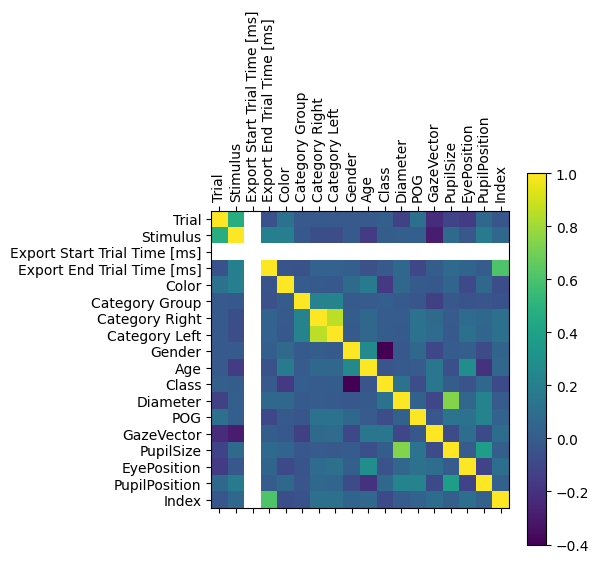

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

corr_matrix = All_Observation.corr()

plt.figure(figsize=(1000,1000))
plt.matshow(corr_matrix)
#plt.xticks(rotation=90)
plt.xticks(range(len(All_Observation.columns)), All_Observation.columns , rotation = 90)
plt.yticks(range(len(All_Observation.columns)), All_Observation.columns)
plt.colorbar()
plt.show()

In [25]:
Column_Name = list(All_Observation. columns. values)
Columns_withNullValue = []
for names in Column_Name:
    if All_Observation[names].isna().sum() >0:
        Columns_withNullValue.append(names)

print(Columns_withNullValue)


print('Number of rows : ' , All_Observation.shape[0])
print('Number of Columns : ' , All_Observation.shape[1])

[]
Number of rows :  999786
Number of Columns :  18


In [26]:
###Decision Tree Classifier

In [27]:
from sklearn.model_selection import train_test_split

X = All_Observation.drop(['Class'],axis=1) 
X_names = All_Observation.loc[:,[col for col in All_Observation.columns if col != 'Class']].columns.tolist()
y=All_Observation['Class'] 
y_names=['TD','ASD'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2, stratify=All_Observation['Class'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Splitting dataset finished successfully***')

(599871, 17)
(399915, 17)
(599871,)
(399915,)
Splitting dataset finished successfully***


In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU, Add, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def residual_block(x, units):
    shortcut = x
    
    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Dense(units)(x)
    x = BatchNormalization()(x)
    
    x = Add()([x, shortcut])
    x = ReLU()(x)
    
    return x

input_shape = (17,)
inputs = Input(shape=input_shape)

x = Dense(64)(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

x = residual_block(x, 64)
x = residual_block(x, 64)
x = residual_block(x, 64)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 17)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      1,152 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      4,160 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64)        │          0 │ batch_normalizat… │
│                     │                   │            │ re_lu[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 64)        │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64)        │      4,160 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_3[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_4[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64)        │          0 │ batch_normalizat… │
│                     │                   │            │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_4 (ReLU)      │ (None, 64)        │          0 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      4,160 │ re_lu_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_5[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 36,353 (142.00 KB)

 Trainable params: 35,457 (138.50 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20


I0000 00:00:1726594602.541878      69 service.cc:145] XLA service 0x78b28000d5d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726594602.541921      69 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726594602.541925      69 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   69/18746 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4739 - loss: 0.9820

I0000 00:00:1726594606.382552      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


18746/18746 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.7189 - loss: 0.5637 - val_accuracy: 0.8351 - val_loss: 0.3607
Epoch 2/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.8363 - loss: 0.3642 - val_accuracy: 0.8801 - val_loss: 0.2738
Epoch 3/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.8699 - loss: 0.2972 - val_accuracy: 0.7457 - val_loss: 0.7900
Epoch 4/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.8967 - loss: 0.2418 - val_accuracy: 0.8908 - val_loss: 0.3009
Epoch 5/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.9159 - loss: 0.2037 - val_accuracy: 0.8522 - val_loss: 0.4437
Epoch 6/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - accuracy: 0.9283 - loss: 0.1750 - val_accuracy: 0.8535 - val_loss: 0.4755
Epoch 7/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.9360 - loss: 0.1587 - val_accuracy: 0.9411 - val_loss: 0.1471
Epoch 8/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9430 - lo

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_shape = (17, 1)  
inputs = Input(shape=input_shape)


x = LSTM(64, return_sequences=True)(inputs)  
x = LSTM(64)(x)  


x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32)

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 17, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 147s 8ms/step - accuracy: 0.7807 - loss: 0.4550 - val_accuracy: 0.9347 - val_loss: 0.1690
Epoch 2/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 142s 8ms/step - accuracy: 0.9416 - loss: 0.1470 - val_accuracy: 0.9689 - val_loss: 0.0758
Epoch 3/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 203s 8ms/step - accuracy: 0.9755 - loss: 0.0640 - val_accuracy: 0.9905 - val_loss: 0.0274
Epoch 4/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 143s 8ms/step - accuracy: 0.9894 - loss: 0.0305 - val_accuracy: 0.9938 - val_loss: 0.0203
Epoch 5/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 204s 8ms/step - accuracy: 0.9935 - loss: 0.0195 - val_accuracy: 0.9956 - val_loss: 0.0135
Epoch 6/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 145s 8ms/step - accuracy: 0.9952 - loss: 0.0144 - val_accuracy: 0.9981 - val_loss: 0.0061
Epoch 7/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 202s 8ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9948 - val_loss: 0.0110
Epoch 8/20
18746/18746 ━━━━━━━━━━━━━━━━━━━━ 144s 8ms/step - ac

In [30]:
print(len(All_Observation))
print(len(X_train))
print(len(X_test))

999786
599871
399915


Accuracy List : [0.7212357625995524, 0.8087643624270158, 0.873070527487091, 0.8998162109448258, 0.9517847542602803, 0.973346836202693, 0.9847192528412287, 0.9978095345260868, 0.9983571508945651, 0.9997149394246277, 0.9997399447382569, 0.9997424452696198, 0.9997424452696198]
Recall List : [0.8614344209440289, 0.7329604075315966, 0.7009285530049006, 0.7379014057260769, 0.9041220660304359, 0.9247565772504514, 0.9904968403404695, 0.9979204281661078, 0.9977108589115296, 0.9993874129481558, 0.999468016507609, 0.9994760768635543, 0.9994760768635543]
Precision List : [0.5312729911912668, 0.6771868158055435, 0.8642674697118777, 0.9238306675412483, 0.9382130549700559, 0.9885914194376707, 0.9614135834826353, 0.9950331125827815, 0.9969956424733998, 0.9996936126296099, 0.9996936373310974, 0.9996936398010271, 0.9996936398010271]


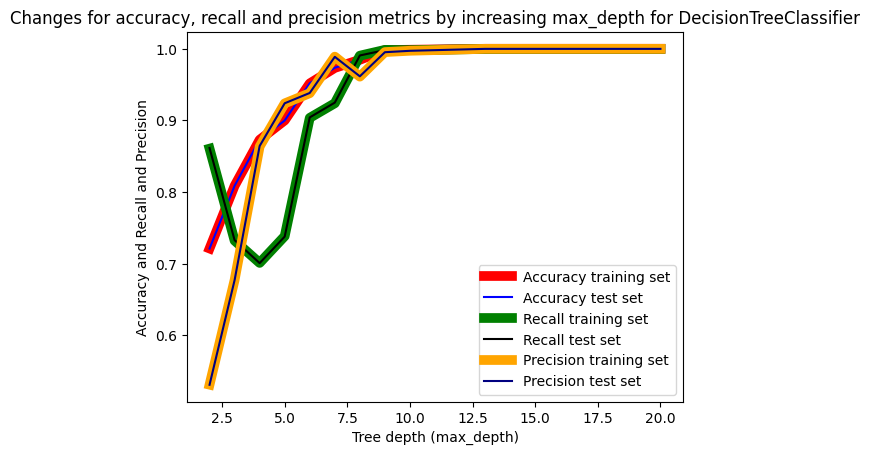

In [31]:
from sklearn import tree
from sklearn import metrics

max_depth_vals = [2,3,4,5,6,7,8,9,10,13,15,17,20]
accuracytrain_list=[]
accuracytest_list=[]
RecallTrain_list=[]
RecallTest_list=[]
PrecisionTrain_list=[]
PrecisionTest_list=[]
for i in range(0,len(max_depth_vals)):

    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=4,
                                               min_samples_split=20, min_samples_leaf=10)
    decision_tree.fit(X_train,y_train)
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    recall_train = metrics.recall_score(y_train, ytrain_pred)
    precison_train = metrics.precision_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    RecallTrain_list.append(recall_train)
    PrecisionTrain_list.append(precison_train)
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    recall_test = metrics.recall_score(y_test, ytest_pred)
    precision_test = metrics.precision_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)
    RecallTest_list.append(recall_test)
    PrecisionTest_list.append(precision_test)

fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,color = 'red', linewidth = 7, label='Accuracy training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,color = 'blue' ,label='Accuracy test set')
line3, = ax.plot(max_depth_vals,RecallTrain_list,color = 'green' , linewidth = 7, label='Recall training set')
line4, = ax.plot(max_depth_vals,RecallTest_list,color = 'black' ,label='Recall test set')
line5, = ax.plot(max_depth_vals,PrecisionTrain_list,color = 'orange' , linewidth = 7, label='Precision training set')
line6, = ax.plot(max_depth_vals,PrecisionTest_list,color = 'navy' ,label='Precision test set')
plt.legend(handles=[line1, line2,line3,line4,line5,line6])
plt.title("Changes for accuracy, recall and precision metrics by increasing max_depth for DecisionTreeClassifier")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy and Recall and Precision")


print("Accuracy List :",accuracytest_list)
print("Recall List :",RecallTest_list)
print("Precision List :",PrecisionTest_list)
plt.show()

In [32]:

from sklearn import tree


decision_tree = tree.DecisionTreeClassifier(max_depth = 8, random_state=7) # Choose tree depth
decision_tree.fit(X_train,y_train)
y_trainpred=decision_tree.predict(X_train)
y_testpred=decision_tree.predict(X_test)

from sklearn import metrics
print("Accuracy on test set:",np.round(metrics.accuracy_score(y_train, y_trainpred),2))
print("Accuracy on test set:",np.round(metrics.accuracy_score(y_test, y_testpred),2))

feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))
print('Features in order of importance:')
for key in feature_importances_sorted:
    print(key)


Accuracy on test set: 0.98
Accuracy on test set: 0.98
Features in order of importance:
Age
Color
Gender
Diameter
EyePosition
Trial
POG
PupilPosition
PupilSize
Export End Trial Time [ms]
Category Right
Stimulus
Export Start Trial Time [ms]
Category Group
Category Left
GazeVector
Index


In [33]:
### Random Forest Classifier

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import tree

# max_depth_vals = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]
# n_estimators_vals = [10, 100]
# mean_accuracy_store = []
# sd_accuracy_store = []
# k = 20

# for value in n_estimators_vals:
#     mean_accuracy_cv = []
#     sd_cv = []
#     for val in max_depth_vals:
#         forest = RandomForestClassifier(n_estimators=value, bootstrap=True, max_features="sqrt", 
#                                         criterion='gini', max_depth=val, random_state=42, oob_score=False)
#         cv_scores = cross_val_score(forest, X, y, cv=k)
#         avg = np.mean(cv_scores)
#         sd = np.std(cv_scores, ddof=1)  # ddof=1 for sample standard deviation
#         mean_accuracy_cv.append(avg)
#         sd_cv.append(sd)
#     mean_accuracy_store.append(mean_accuracy_cv)
#     sd_accuracy_store.append(sd_cv)

# fig, ax = plt.subplots()
# line2, = ax.plot(max_depth_vals, mean_accuracy_store[0], color='black', label='10 trees')
# line3, = ax.plot(max_depth_vals, mean_accuracy_store[1], color='red', label='100 trees')

# mean_accuracy_cv = []
# for val in max_depth_vals:
#     decision_tree = tree.DecisionTreeClassifier(max_depth=val, random_state=42)
#     cv_scores = cross_val_score(decision_tree, X, y, cv=k)
#     avg = np.mean(cv_scores)
#     mean_accuracy_cv.append(avg)

# line1, = ax.plot(max_depth_vals, mean_accuracy_cv, color='green', label='1 tree')

# plt.legend(handles=[line1, line2, line3])
# plt.xlabel("Tree depth")
# plt.ylabel("Mean accuracy")
# plt.title("Model Performance vs. Tree Depth")
# plt.show()


In [35]:
# from sklearn.svm import SVC
# from sklearn import metrics
# import matplotlib.pyplot as plt

# # Define the range of hyperparameters to test
# C_vals = [ 0.1, 1, 10, 100, 1000]  # Regularization parameter for SVM
# kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']  # Types of kernels to use

# accuracytrain_list = []
# accuracytest_list = []
# RecallTrain_list = []
# RecallTest_list = []
# PrecisionTrain_list = []
# PrecisionTest_list = []

# for kernel in kernel_types:
#     for C in C_vals:
#         svm = SVC(C=C, kernel=kernel, random_state=4)
#         svm.fit(X_train, y_train)

#         # Training set
#         ytrain_pred = svm.predict(X_train)
#         accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
#         recall_train = metrics.recall_score(y_train, ytrain_pred)
#         precision_train = metrics.precision_score(y_train, ytrain_pred)
#         accuracytrain_list.append(accuracy_train)
#         RecallTrain_list.append(recall_train)
#         PrecisionTrain_list.append(precision_train)

#         # Test set
#         ytest_pred = svm.predict(X_test)
#         accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
#         recall_test = metrics.recall_score(y_test, ytest_pred)
#         precision_test = metrics.precision_score(y_test, ytest_pred)
#         accuracytest_list.append(accuracy_test)
#         RecallTest_list.append(recall_test)
#         PrecisionTest_list.append(precision_test)

# # Plot accuracy, recall, and precision as a function of C and kernel type
# fig, ax = plt.subplots(figsize=(14, 7))

# # Plot accuracy
# line1, = ax.plot(accuracytrain_list, color='red', linewidth=2, label='Accuracy training set')
# line2, = ax.plot(accuracytest_list, color='blue', label='Accuracy test set')

# # Plot recall
# line3, = ax.plot(RecallTrain_list, color='green', linewidth=2, label='Recall training set')
# line4, = ax.plot(RecallTest_list, color='black', label='Recall test set')

# # Plot precision
# line5, = ax.plot(PrecisionTrain_list, color='orange', linewidth=2, label='Precision training set')
# line6, = ax.plot(PrecisionTest_list, color='navy', label='Precision test set')

# ax.legend(handles=[line1, line2, line3, line4, line5, line6])
# ax.set_title("Changes for accuracy, recall, and precision metrics by hyperparameter tuning for SVM")
# ax.set_xlabel("Parameter Index")
# ax.set_ylabel("Accuracy, Recall, and Precision")

# plt.show()

# # Print metrics
# print("Accuracy List:", accuracytest_list)
# print("Recall List:", RecallTest_list)
# print("Precision List:", PrecisionTest_list)


In [36]:
# from sklearn.svm import SVC
# from sklearn import metrics

# # Initialize and train the SVM classifier
# svm_classifier = SVC(kernel='linear', random_state=7) # You can also try other kernels such as 'rbf'
# svm_classifier.fit(X_train, y_train)

# # Make predictions
# y_trainpred_svm = svm_classifier.predict(X_train)
# y_testpred_svm = svm_classifier.predict(X_test)

# # Print accuracy
# print("SVM Accuracy on training set:", np.round(metrics.accuracy_score(y_train, y_trainpred_svm), 2))
# print("SVM Accuracy on test set:", np.round(metrics.accuracy_score(y_test, y_testpred_svm), 2))

# # Feature importances for SVM are not available directly; you need to use other methods for interpretation.


In [37]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# # Initialize and train the k-NN classifier
# knn_classifier = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
# knn_classifier.fit(X_train, y_train)

# # Make predictions
# y_trainpred_knn = knn_classifier.predict(X_train)
# y_testpred_knn = knn_classifier.predict(X_test)

# # Print accuracy
# print("k-NN Accuracy on training set:", np.round(metrics.accuracy_score(y_train, y_trainpred_knn), 2))
# print("k-NN Accuracy on test set:", np.round(metrics.accuracy_score(y_test, y_testpred_knn), 2))

# # Feature importances for k-NN are not available directly; you need to use other methods for interpretation.


In [38]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics

# knn_classifier = KNeighborsClassifier(n_neighbors=5)  
# knn_classifier.fit(X_train, y_train)

# y_trainpred_knn = knn_classifier.predict(X_train)
# y_testpred_knn = knn_classifier.predict(X_test)

# print("k-NN Accuracy on training set:", np.round(metrics.accuracy_score(y_train, y_trainpred_knn), 2))
# print("k-NN Accuracy on test set:", np.round(metrics.accuracy_score(y_test, y_testpred_knn), 2))

# print("k-NN Confusion Matrix:")
# print(metrics.confusion_matrix(y_test, y_testpred_knn))

# print("k-NN Classification Report:")
# print(metrics.classification_report(y_test, y_testpred_knn, target_names=y_names))


In [39]:
# from sklearn.svm import SVC
# from sklearn import metrics

# # Initialize and train the SVM classifier
# svm_classifier = SVC(kernel='linear', random_state=2)  # You can try different kernels like 'rbf' for non-linear classification
# svm_classifier.fit(X_train, y_train)

# # Make predictions
# y_trainpred_svm = svm_classifier.predict(X_train)
# y_testpred_svm = svm_classifier.predict(X_test)

# # Print accuracy
# print("SVM Accuracy on training set:", np.round(metrics.accuracy_score(y_train, y_trainpred_svm), 2))
# print("SVM Accuracy on test set:", np.round(metrics.accuracy_score(y_test, y_testpred_svm), 2))

# # Optionally, you can print the confusion matrix and classification report
# print("SVM Confusion Matrix:")
# print(metrics.confusion_matrix(y_test, y_testpred_svm))

# print("SVM Classification Report:")
# print(metrics.classification_report(y_test, y_testpred_svm, target_names=y_names))


In [40]:
X_train.head()

,Trial,Stimulus,Export Start Trial Time [ms],Export End Trial Time [ms],Color,Category Group,Category Right,Category Left,Gender,Age,Diameter,POG,GazeVector,PupilSize,EyePosition,PupilPosition,Index
597471,21,88,0.0,16294.917,29,0,1.0,1.0,0,10.6,8.687500,1400.0,0.000000,52.6875,966.0,2196.0,76.0
1167581,1,0,0.0,52037.655,22,0,1.0,1.0,1,8.9,7.203125,807.0,0.000000,62.1250,1374.0,1814.0,64.0
830252,6,114,0.0,2885.714,7,0,1.0,1.0,0,8.9,5.417969,2902.0,0.000000,48.6250,1180.0,2498.0,11.0
917535,17,74,0.0,2901.119,4,0,1.0,1.0,0,7.1,7.132812,809.0,-1.887695,52.6875,1130.0,2784.0,11.0
296381,19,135,0.0,48836.351,27,0,1.0,1.0,0,4.2,7.132812,1630.0,0.000000,52.6875,1408.0,2792.0,148.0


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [44]:
y_pred = knn.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9972594176262456


In [46]:
from sklearn.ensemble import RandomForestClassifier



rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['TD', 'ASD']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9999899978745483
Classification Report:
              precision    recall  f1-score   support

          TD       1.00      1.00      1.00    275851
         ASD       1.00      1.00      1.00    124064

    accuracy                           1.00    399915
   macro avg       1.00      1.00      1.00    399915
weighted avg       1.00      1.00      1.00    399915

Confusion Matrix:
[[275848      3]
 [     1 124063]]
